# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset is imported.

In [2]:
data=pd.read_csv("hindi_digits.csv")
data.head()

,4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data.shape

(17000, 1025)

In [3]:
list=["label"]
for i in range(1,1025):
    list.append(i)
    

# Adding Column Names to the Dataset

In [4]:
data=pd.read_csv("hindi_digits.csv",names=list)
data.head()

,label,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separating Features and Labels 

In [5]:
X=data.iloc[:,1:].values
y=data.iloc[:,0:1].values

# Checking shape of Dataset

In [6]:
X.shape

(17000, 1024)

In [7]:
y.shape

(17000, 1)

# Visualization of 10 Classes of the Dataset

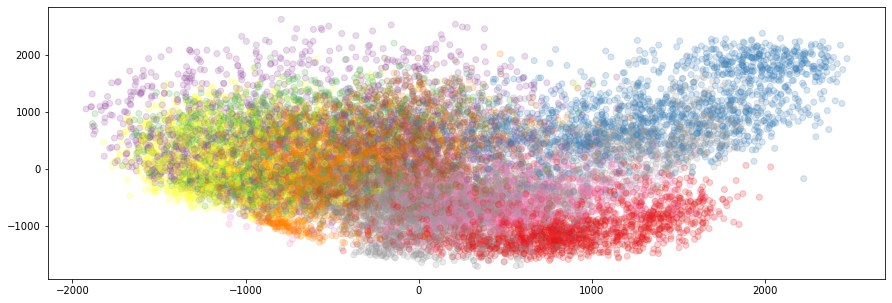

In [8]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
view = pca.fit_transform(X)
plt.figure(figsize=(15,5))
plt.scatter(view[:,0], view[:,1], c=y, alpha=0.2,cmap='Set1')

# Normalizing Values of the Features

In [42]:
my_scaled_X_train=X_train/255
my_scaled_X_test=X_test/255

# Applying Principle Component Analysis on the Features

In [43]:
from sklearn.decomposition import PCA
my_pca=PCA(0.98)
X_train_pca=my_pca.fit_transform(my_scaled_X_train)
X_test_pca=my_pca.transform(my_scaled_X_test)

# Checking the shape of the features after PCA

In [44]:
X_train_pca.shape

(11900, 250)

# Splitting the Data into 2 sets: Training and Testing 

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Importing KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
my_knn=KNeighborsClassifier(n_neighbors=17)

In [47]:
my_knn.fit(X_train_pca,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

In [48]:
accuracy_score(my_knn.predict(X_test_pca),y_test)

0.9656862745098039

# Calculation of Training Time

In [72]:
import time
start=time.time()
my_knn.fit(X_train_pca,y_train)
stop=time.time()
print("Training Time: ",stop-start )

Training Time:  0.02692556381225586


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Calculation of Testing Time

In [64]:
import time
start=time.time()
print(accuracy_score(my_knn.predict(X_test_pca),y_test))
stop=time.time()
print("Testing Time: ",stop-start )


0.9656862745098039
Testing Time:  3.8966310024261475


In [49]:
from sklearn.model_selection import cross_val_score

# Cross-Validation Done here.

In [51]:
cross_val_score(KNeighborsClassifier(n_neighbors=17),X_train_pca,y_train,cv=5)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.95966387, 0.96596639, 0.96722689, 0.96386555, 0.96680672])

# Confusion Matrix of KNN Classifier

Text(0.5, 42.0, 'Predicted Value')

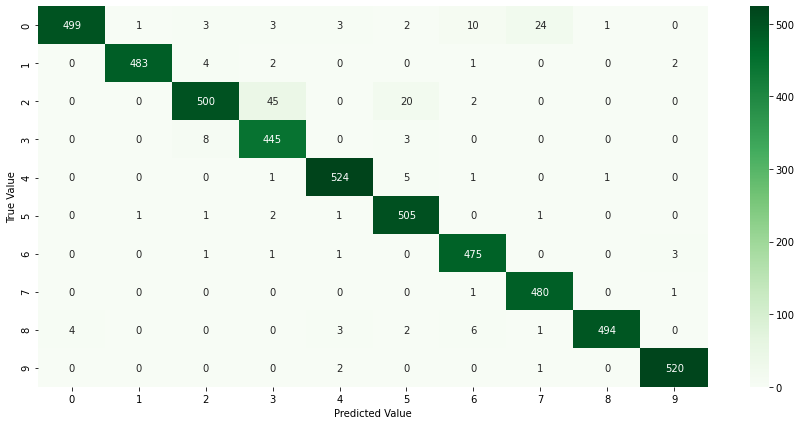

In [65]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix(my_knn.predict(X_test_pca),y_test),annot=True,fmt='d',cmap='Greens')
plt.ylabel("True Value")
plt.xlabel("Predicted Value")

In [66]:
print(classification_report(my_knn.predict(X_test_pca),y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       546
           1       1.00      0.98      0.99       492
           2       0.97      0.88      0.92       567
           3       0.89      0.98      0.93       456
           4       0.98      0.98      0.98       532
           5       0.94      0.99      0.96       511
           6       0.96      0.99      0.97       481
           7       0.95      1.00      0.97       482
           8       1.00      0.97      0.98       510
           9       0.99      0.99      0.99       523

    accuracy                           0.97      5100
   macro avg       0.97      0.97      0.97      5100
weighted avg       0.97      0.97      0.97      5100



# MNIST DATASET

In [52]:
mnist=pd.read_csv("mnist_train.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X=mnist.iloc[:,1:].values
y=mnist.iloc[:,0:1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train_mnist,X_test_mnist,y_train_mnist,y_test_mnist=train_test_split(X,y,test_size=0.2,random_state=7)


In [55]:
X_train_mnist=X_train_mnist/255
X_test_mnist=X_test_mnist/255

In [56]:
from sklearn.decomposition import PCA
my_pca=PCA(0.98)
X_train_mnist_pca=my_pca.fit_transform(X_train_mnist)
X_test_mnist_pca=my_pca.transform(X_test_mnist)

In [71]:
X_train

(48000, 260)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
my_knn_mnist=KNeighborsClassifier(n_neighbors=1)

In [58]:
import time
start=time.time()
my_knn_mnist.fit(X_train_mnist_pca,y_train_mnist)
stop=time.time()
print("Training Time: ",stop-start )

Training Time:  0.05086469650268555


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [62]:
import time
start=time.time()
print(accuracy_score(my_knn_mnist.predict(X_test_mnist_pca),y_test_mnist))
stop=time.time()
print("Testing Time: ",stop-start )


0.973
Testing Time:  28.054097890853882


In [67]:
print(classification_report(my_knn_mnist.predict(X_test_mnist_pca),y_test_mnist))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1148
           1       0.99      0.97      0.98      1375
           2       0.98      0.99      0.99      1124
           3       0.96      0.98      0.97      1221
           4       0.96      0.97      0.97      1191
           5       0.97      0.96      0.97      1119
           6       0.99      0.98      0.98      1219
           7       0.98      0.97      0.97      1305
           8       0.94      0.98      0.96      1146
           9       0.96      0.95      0.96      1152

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [68]:
import time
start=time.time()
my_knn_mnist.fit(X_train_mnist,y_train_mnist)
stop=time.time()
print("Training Time: ",stop-start )

Training Time:  0.4547855854034424


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
import time
start=time.time()
print(accuracy_score(my_knn_mnist.predict(X_test_mnist),y_test_mnist))
stop=time.time()
print("Testing Time: ",stop-start )


0.9726666666666667
Testing Time:  26.87114667892456


In [70]:
print(classification_report(my_knn_mnist.predict(X_test_mnist),y_test_mnist))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1150
           1       0.99      0.97      0.98      1374
           2       0.98      0.99      0.98      1123
           3       0.96      0.98      0.97      1223
           4       0.96      0.97      0.97      1191
           5       0.97      0.96      0.97      1118
           6       0.99      0.98      0.98      1217
           7       0.98      0.97      0.97      1305
           8       0.94      0.98      0.96      1146
           9       0.96      0.95      0.96      1153

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

